In [5]:
import sys
print(sys.executable)


C:\Users\hp\AppData\Local\Programs\Python\Python310\python.exe


In [7]:
!{sys.executable} -m pip install polars

  Using cached polars-1.35.1-py3-none-any.whl.metadata (10 kB)
  Using cached polars_runtime_32-1.35.1-cp39-abi3-win_amd64.whl.metadata (1.5 kB)
Using cached polars-1.35.1-py3-none-any.whl (783 kB)
Using cached polars_runtime_32-1.35.1-cp39-abi3-win_amd64.whl (41.3 MB)

   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   ---------------------------------------- 0/2 [polars-runtime-32]
   -------------------- ------------------- 1/2 [

In [9]:
import polars as pl
print(pl.__version__)

1.35.1


In [11]:
!pip install tqdm


In [15]:
import os
import shutil
import random
from tqdm import tqdm

# Paths
source_dir = r"C:\Users\hp\Downloads\Plant_leave_diseases_dataset_without_augmentation"
base_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Create folders if not exist
for d in [train_dir, val_dir, test_dir]:
    os.makedirs(d, exist_ok=True)

split_ratio = (0.7, 0.15, 0.15)  # train, val, test

for cls in tqdm(os.listdir(source_dir)):
    class_path = os.path.join(source_dir, cls)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    random.shuffle(images)
    n = len(images)

    n_train = int(n * split_ratio[0])
    n_val = int(n * split_ratio[1])
    n_test = n - n_train - n_val

    subsets = {
        train_dir: images[:n_train],
        val_dir: images[n_train:n_train + n_val],
        test_dir: images[n_train + n_val:]
    }

    for target_dir, subset in subsets.items():
        os.makedirs(os.path.join(target_dir, cls), exist_ok=True)
        for img in subset:
            src = os.path.join(class_path, img)
            dst = os.path.join(target_dir, cls, img)
            shutil.copy2(src, dst)

print("✅ Dataset successfully divided into train / val / test folders.")


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [17:19<00:00, 26.66s/it]

✅ Dataset successfully divided into train / val / test folders.


In [1]:
import polars as pl
print(pl.__version__)

1.35.1


In [3]:
try:
    from PIL import Image
    print("✅ Pillow (PIL) is installed and ready to use!")
except ImportError:
    print("❌ Pillow (PIL) is NOT installed. Installing now...")
    !pip install Pillow


✅ Pillow (PIL) is installed and ready to use!


In [7]:
import os
from PIL import Image

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\train"

print("✅ Started scanning the train dataset...")
folder_count = 0
total_images = 0
wrong_size_images = []

# Loop through all 39 folders (categories)
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)
    if os.path.isdir(folder_path):
        folder_count += 1
        print(f"\n📂 Checking folder {folder_count}: {folder_name}...")
        image_count = 0

        # Loop through each image in the folder
        for image_file in os.listdir(folder_path):
            if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(folder_path, image_file)
                try:
                    img = Image.open(image_path)
                    w, h = img.size
                    image_count += 1
                    total_images += 1

                    # Check resolution
                    if (w, h) != (256, 256):
                        wrong_size_images.append((folder_name, image_file, (w, h)))

                    if image_count % 100 == 0:
                        print(f"   🔹 Processed {image_count} images in {folder_name}...")
                except Exception as e:
                    print(f"⚠️ Error in {image_file}: {e}")

print("\n✅ Scanning completed!")
print(f"📦 Total folders scanned: {folder_count}")
print(f"🖼️ Total images checked: {total_images}")
print(f"❌ Wrong size images found: {len(wrong_size_images)}")

if wrong_size_images:
    print("\nHere are first few wrong-size images:")
    for item in wrong_size_images[:10]:
        print(f"  {item[0]} → {item[1]} (Size: {item[2]})")
else:
    print("🎯 All images are correctly sized (256x256).")


✅ Started scanning the train dataset...

📂 Checking folder 1: Apple___Apple_scab...
   🔹 Processed 100 images in Apple___Apple_scab...
   🔹 Processed 200 images in Apple___Apple_scab...
   🔹 Processed 300 images in Apple___Apple_scab...
   🔹 Processed 400 images in Apple___Apple_scab...

📂 Checking folder 2: Apple___Black_rot...
   🔹 Processed 100 images in Apple___Black_rot...
   🔹 Processed 200 images in Apple___Black_rot...
   🔹 Processed 300 images in Apple___Black_rot...
   🔹 Processed 400 images in Apple___Black_rot...

📂 Checking folder 3: Apple___Cedar_apple_rust...
   🔹 Processed 100 images in Apple___Cedar_apple_rust...

📂 Checking folder 4: Apple___healthy...
   🔹 Processed 100 images in Apple___healthy...
   🔹 Processed 200 images in Apple___healthy...
   🔹 Processed 300 images in Apple___healthy...
   🔹 Processed 400 images in Apple___healthy...
   🔹 Processed 500 images in Apple___healthy...
   🔹 Processed 600 images in Apple___healthy...
   🔹 Processed 700 images in Appl

In [9]:
from PIL import Image
import os
from tqdm import tqdm

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\train"

non_rgb_images = []

print("🎨 Checking image color modes...")
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        if img.mode != "RGB":
                            non_rgb_images.append((class_name, img_file, img.mode))
                except Exception as e:
                    print(f"⚠️ Error opening {img_path}: {e}")

print("\n✅ RGB Check Completed!")
print(f"🖼️ Total non-RGB images found: {len(non_rgb_images)}")

if non_rgb_images:
    print("\nHere are first few examples:")
    for entry in non_rgb_images[:10]:
        print(f"  {entry[0]} → {entry[1]} (Mode: {entry[2]})")
else:
    print("🎯 All images are in RGB format — perfect for training!")


🎨 Checking image color modes...

✅ RGB Check Completed!
🖼️ Total non-RGB images found: 0
🎯 All images are in RGB format — perfect for training!


In [11]:
import os
from PIL import Image
from tqdm import tqdm

train_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\train"

corrupted_images = []
class_counts = {}

print("🔍 Checking corrupted images and class balance...\n")

for folder in tqdm(os.listdir(train_dir)):
    folder_path = os.path.join(train_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    images = os.listdir(folder_path)
    class_counts[folder] = len(images)

    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()  # verifies without loading entire image
        except Exception:
            corrupted_images.append((folder, img_name))

print("\n✅ Scan Completed!")
print(f"📁 Total folders checked: {len(class_counts)}")
print(f"🖼️ Total corrupted images found: {len(corrupted_images)}")

if corrupted_images:
    print("\nHere are some corrupted images:")
    for f, i in corrupted_images[:10]:
        print(f"  {f} → {i}")

print("\n📊 Image Count per Class:")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")


🔍 Checking corrupted images and class balance...



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:11<00:00,  3.20it/s]


✅ Scan Completed!
📁 Total folders checked: 38
🖼️ Total corrupted images found: 0

📊 Image Count per Class:
  Apple___Apple_scab: 441 images
  Apple___Black_rot: 434 images
  Apple___Cedar_apple_rust: 192 images
  Apple___healthy: 1151 images
  Blueberry___healthy: 1051 images
  Cherry___healthy: 597 images
  Cherry___Powdery_mildew: 736 images
  Corn___Cercospora_leaf_spot Gray_leaf_spot: 359 images
  Corn___Common_rust: 834 images
  Corn___healthy: 813 images
  Corn___Northern_Leaf_Blight: 689 images
  Grape___Black_rot: 826 images
  Grape___Esca_(Black_Measles): 968 images
  Grape___healthy: 296 images
  Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 753 images
  Orange___Haunglongbing_(Citrus_greening): 3854 images
  Peach___Bacterial_spot: 1607 images
  Peach___healthy: 251 images
  Pepper,_bell___Bacterial_spot: 697 images
  Pepper,_bell___healthy: 1034 images
  Potato___Early_blight: 700 images
  Potato___healthy: 106 images
  Potato___Late_blight: 700 images
  Raspberry___healthy:

In [13]:
try:
    import cv2
    print("✅ OpenCV (cv2) is installed and ready to use!")
except ImportError:
    print("❌ OpenCV not found. Installing now...")
    !pip install opencv-python


✅ OpenCV (cv2) is installed and ready to use!


In [15]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Paths
source_dir = r"C:\Users\hp\Downloads\crop-disease-splitted-dataset\train"
target_dir = r"C:\Users\hp\Downloads\crop-disease-preprocessed\train"

def preprocess_image(img):
    # 1. Normalize pixel values (0–1)
    img = img.astype(np.float32) / 255.0
    
    # 2. Histogram equalization (improves contrast)
    img_yuv = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2YCrCb)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    img_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YCrCb2RGB)
    
    # 3. Optional: Gaussian blur (reduces small noise)
    img_blur = cv2.GaussianBlur(img_eq, (3, 3), 0)
    
    return img_blur

print("⚙️ Starting preprocessing of images...\n")

# Loop through each class folder
for folder in tqdm(os.listdir(source_dir)):
    src_folder = os.path.join(source_dir, folder)
    dst_folder = os.path.join(target_dir, folder)
    os.makedirs(dst_folder, exist_ok=True)
    
    for img_name in os.listdir(src_folder):
        img_path = os.path.join(src_folder, img_name)
        save_path = os.path.join(dst_folder, img_name)

        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            processed_img = preprocess_image(img)

            # Save back as jpg (uint8)
            cv2.imwrite(save_path, cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR))
        except Exception as e:
            print(f"❌ Error on {img_name}: {e}")

print("\n✅ Preprocessing completed and saved to:")
print(target_dir)


⚙️ Starting preprocessing of images...



100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [05:27<00:00,  8.61s/it]


✅ Preprocessing completed and saved to:
C:\Users\hp\Downloads\crop-disease-preprocessed\train


In [ ]:
import os
import cv2
import numpy as np
import polars as pl
from tqdm import tqdm
from skimage.feature import graycomatrix, graycoprops

# Paths
data_dir = r"C:\Users\hp\Downloads\crop-disease-preprocessed\train"
output_file = r"C:\Users\hp\Downloads\crop_features.parquet"

def extract_features(img):
    # Convert to grayscale for texture features
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # --- Color features ---
    mean = np.mean(img, axis=(0,1))
    std = np.std(img, axis=(0,1))
    
    # --- Texture features (GLCM) ---
    glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0,0]
    correlation = graycoprops(glcm, 'correlation')[0,0]
    energy = graycoprops(glcm, 'energy')[0,0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
    
    return np.hstack([mean, std, contrast, correlation, energy, homogeneity])

# Store all features
records = []

print("⚙️ Extracting color & texture features...\n")

for folder in tqdm(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            feats = extract_features(img)
            records.append([folder, *feats])
        except:
            pass

# Convert to Polars DataFrame
columns = [
    "label", 
    "mean_r", "mean_g", "mean_b",
    "std_r", "std_g", "std_b",
    "contrast", "correlation", "energy", "homogeneity"
]
df = pl.DataFrame(records, schema=columns)

# Save as parquet file
df.write_parquet(output_file)

print(f"\n✅ Features extracted and saved to: {output_file}")
print(f"Total samples: {df.shape[0]}")


In [19]:
import polars as pl

df = pl.read_parquet(r"C:\Users\hp\Downloads\crop_features.parquet")
print(df.head())        # show first 5 rows
print(df.shape)         # see number of rows and columns


shape: (5, 11)
┌────────────────────┬────────────┬────────────┬────────────┬───┬────────────┬─────────────┬──────────┬─────────────┐
│ label              ┆ mean_r     ┆ mean_g     ┆ mean_b     ┆ … ┆ contrast   ┆ correlation ┆ energy   ┆ homogeneity │
│ ---                ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---        ┆ ---         ┆ ---      ┆ ---         │
│ str                ┆ f64        ┆ f64        ┆ f64        ┆   ┆ f64        ┆ f64         ┆ f64      ┆ f64         │
╞════════════════════╪════════════╪════════════╪════════════╪═══╪════════════╪═════════════╪══════════╪═════════════╡
│ Apple___Apple_scab ┆ 122.926727 ┆ 138.870865 ┆ 101.619614 ┆ … ┆ 111.78848  ┆ 0.988896    ┆ 0.016174 ┆ 0.233676    │
│ Apple___Apple_scab ┆ 115.444275 ┆ 134.601547 ┆ 133.72226  ┆ … ┆ 237.320052 ┆ 0.974093    ┆ 0.012231 ┆ 0.142493    │
│ Apple___Apple_scab ┆ 123.756287 ┆ 131.24292  ┆ 131.89827  ┆ … ┆ 111.629013 ┆ 0.989054    ┆ 0.015373 ┆ 0.208925    │
│ Apple___Apple_scab ┆ 118.678513 ┆ 133.3

In [21]:
df['label'].value_counts()

label,count
str,u32
"""Peach___healthy""",251
"""Tomato___Septoria_leaf_spot""",1239
"""Orange___Haunglongbing_(Citrus…",3854
"""Grape___Leaf_blight_(Isariopsi…",753
"""Corn___Common_rust""",834
…,…
"""Potato___Late_blight""",700
"""Cherry___Powdery_mildew""",736
"""Raspberry___healthy""",259


In [1]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [5]:
import matplotlib
print(matplotlib.__version__)

3.10.7


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load features
df = pd.read_parquet(r"C:\Users\hp\Downloads\crop_features.parquet")
df.head()

,label,mean_r,mean_g,mean_b,std_r,std_g,std_b,contrast,correlation,energy,homogeneity
0,Apple___Apple_scab,122.926727,138.870865,101.619614,78.519502,66.615772,83.514542,111.788480,0.988896,0.016174,0.233676
1,Apple___Apple_scab,115.444275,134.601547,133.722260,66.930721,67.880134,73.568089,237.320052,0.974093,0.012231,0.142493
2,Apple___Apple_scab,123.756287,131.242920,131.898270,76.688321,67.275197,85.716377,111.629013,0.989054,0.015373,0.208925
3,Apple___Apple_scab,118.678513,133.362900,132.454895,74.912786,65.759412,82.696703,110.138940,0.988688,0.013211,0.163847
4,Apple___Apple_scab,123.860748,131.147507,129.159866,74.928762,66.544121,85.988320,110.375965,0.988964,0.015561,0.225125


In [7]:
# 1️⃣ Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# 2️⃣ Split data
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']



In [15]:
# 2️⃣ Split data (with stratify to handle imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf', 
    C=10, 
    gamma='scale', 
    class_weight='balanced'  # automatically handles class imbalance
)
svm.fit(X_train, y_train)
print("SVC model trained with class weighting")


SVC model trained with class weighting


In [19]:
# 4️⃣ Predictions
y_pred = svm.predict(X_test)

# 5️⃣ Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc*100:.2f}%\n")

print("📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


✅ Model Accuracy: 48.57%

📊 Classification Report:
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.25      0.35      0.29        88
                            Apple___Black_rot       0.16      0.37      0.22        87
                     Apple___Cedar_apple_rust       0.08      0.39      0.13        38
                              Apple___healthy       0.53      0.55      0.54       230
                          Blueberry___healthy       0.52      0.45      0.48       210
                      Cherry___Powdery_mildew       0.33      0.32      0.32       147
                             Cherry___healthy       0.63      0.83      0.72       119
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.40      0.57      0.47        72
                           Corn___Common_rust       0.91      0.92      0.91       167
                  Corn___Northern_Leaf_Blight       0.25      0.31      0.28  

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 31   3   1 ...   0   2   3]
 [  5  32   0 ...   0  10   2]
 [  0   0  15 ...   1   0   0]
 ...
 [  1   4  84 ... 106   0   0]
 [  0   0   0 ...   0  45   1]
 [  0   0   0 ...   0   3 192]]


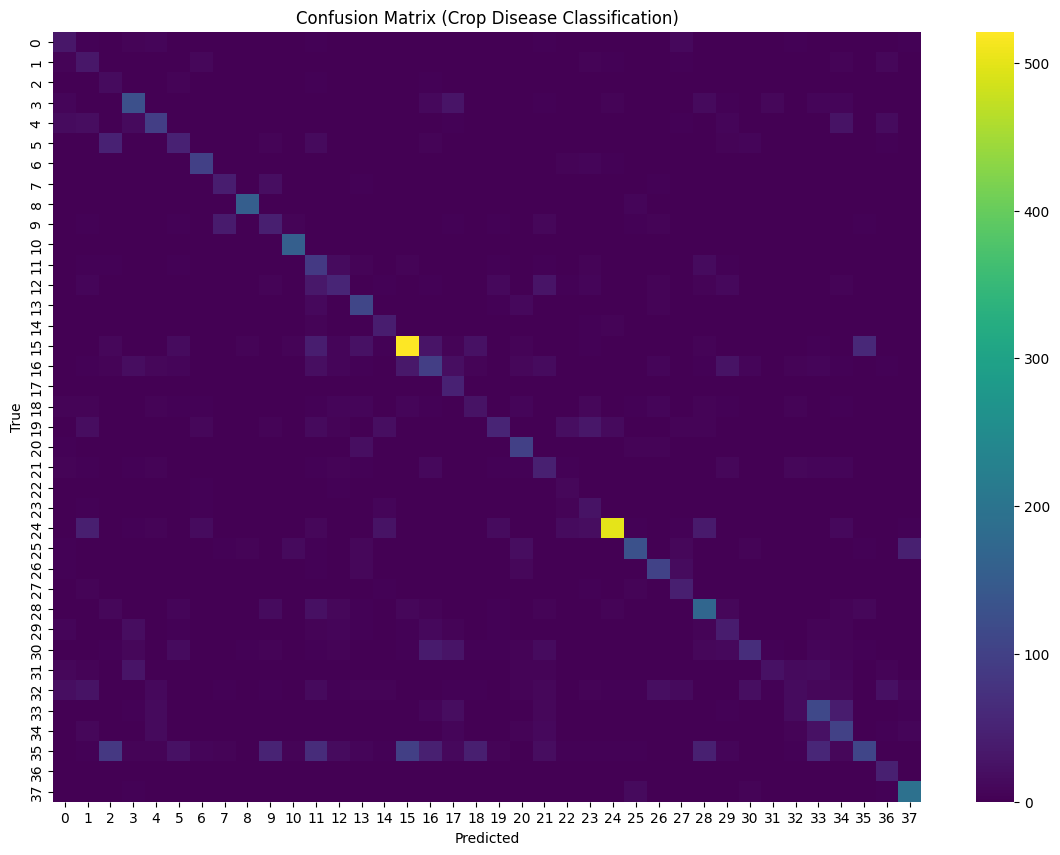

In [21]:
# 6️⃣ Confusion Matrix
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=False, cmap='viridis')
plt.title("Confusion Matrix (Crop Disease Classification)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [25]:
import joblib

# Suppose your trained model is called 'model'
joblib.dump(svm, "trained_model.pkl")


['trained_model.pkl']